In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller #used for ADF test
from statsmodels.tsa.ar_model import AutoReg #used for autoregressive model
from statsmodels.tsa.arima.model import ARIMA #used for arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv("dataset/electricity_bill_dataset.csv")

In [3]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [4]:
df['Month']=pd.to_datetime(df['Month'])

df=df.sort_values("Month")
df.set_index("Month",inplace=True)

In [5]:
encoder=LabelEncoder()
df["City"]=encoder.fit_transform(df["City"])
df["Company"]=encoder.fit_transform(df["Company"])


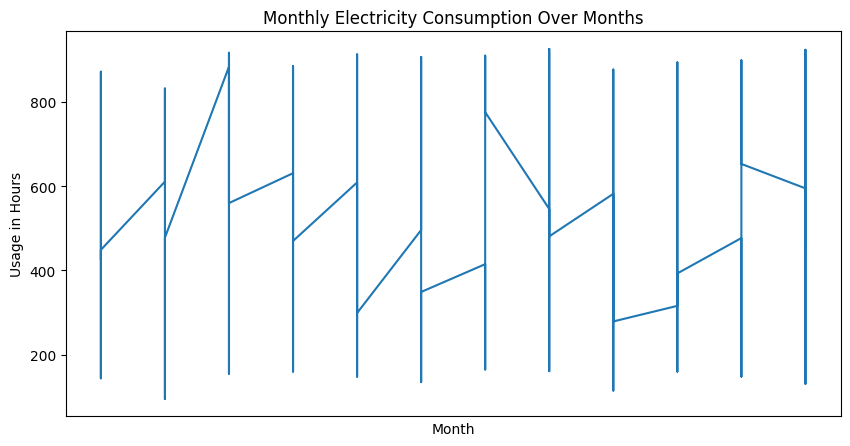

In [6]:
ts=df["MonthlyHours"]

plt.figure(figsize=(10,5))

plt.plot(ts)
plt.title("Monthly Electricity Consumption Over Months")
plt.xlabel("Month")
plt.ylabel("Usage in Hours")
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller #used for ADF test to check stationarity in dataset

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print("Stationary" if result[1] <= 0.05 else "Non-Stationary")

adf_test(ts)

ADF Statistic: -19.241492723396977
p-value: 0.0
Stationary


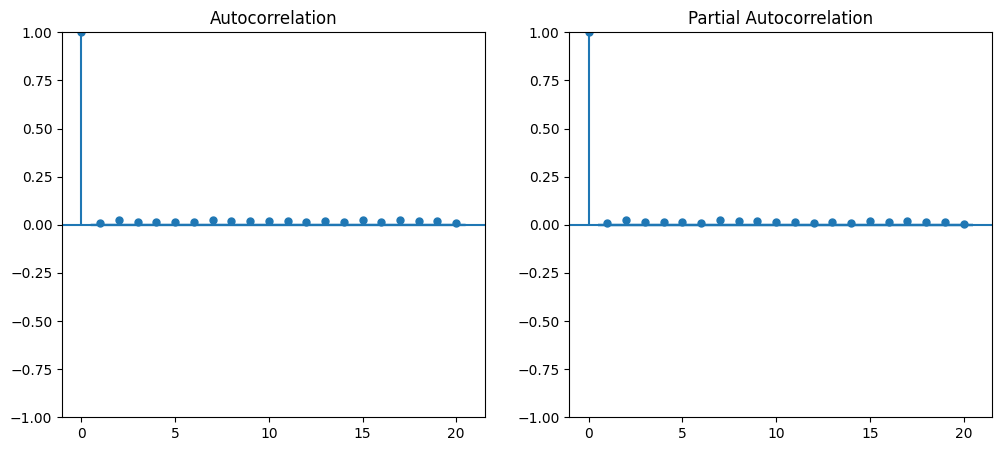

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(ts, ax=plt.gca(), lags=20)

plt.subplot(122)
plot_pacf(ts, ax=plt.gca(), lags=20)
plt.show()

In [9]:
train_size = int(len(ts) * 0.8)
train,test=ts[:train_size],ts[train_size:]

ar_model=AutoReg(train,lags=5)
ar_fit=ar_model.fit()
ar_pred=ar_fit.predict(start=len(train),end=len(ts)-1)

c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with 

In [10]:
from statsmodels.tsa.arima.model import ARIMA #this arma coz d=0;
arma_model=ARIMA(train,order=(3,0,2))
arma_fit=arma_model.fit()
arma_pred=arma_fit.predict(start=len(train),end=len(ts)-1)

c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

In [13]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA #this arima coz d!=0;
arima_model=ARIMA(train,order=(3,1,2))
arima_fit=arima_model.fit()
arima_pred=arima_fit.predict(start=len(train),end=len(ts)-1)

c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

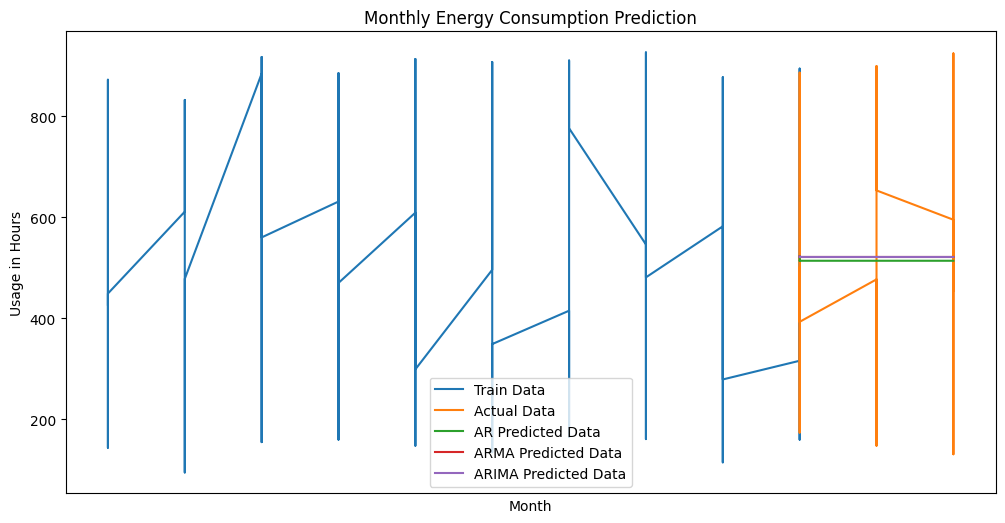

In [15]:
plt.figure(figsize=(12,6))

plt.plot(train.index,train,label="Train Data")
plt.plot(test.index,test,label="Actual Data")

plt.plot(test.index,ar_pred,label="AR Predicted Data")
plt.plot(test.index,arma_pred,label="ARMA Predicted Data")
plt.plot(test.index,arima_pred,label="ARIMA Predicted Data")

plt.title("Monthly Energy Consumption Prediction")
plt.xlabel("Month")
plt.ylabel("Usage in Hours")
plt.legend()
plt.show()


In [21]:
target="ElectricityBill"

exog_features=[
    "Fan","Refrigerator","AirConditioner","Television",
    "Monitor","MotorPump","MonthlyHours",
    "TariffRate","City","Company"
]
X=df[exog_features]
y=df[target]

In [22]:
train_size = int(len(df) * 0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(
    y_train,
    exog=X_train,
    order=(2,1,2),
    seasonal_order=(1,1,1,12)

)
model_fit=model.fit(disp=False)

c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
y_pred=model_fit.predict(start=len(y_train),end=len(y)-1,exog=X_test)

c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sharm\Desktop\GENAIandLLM\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


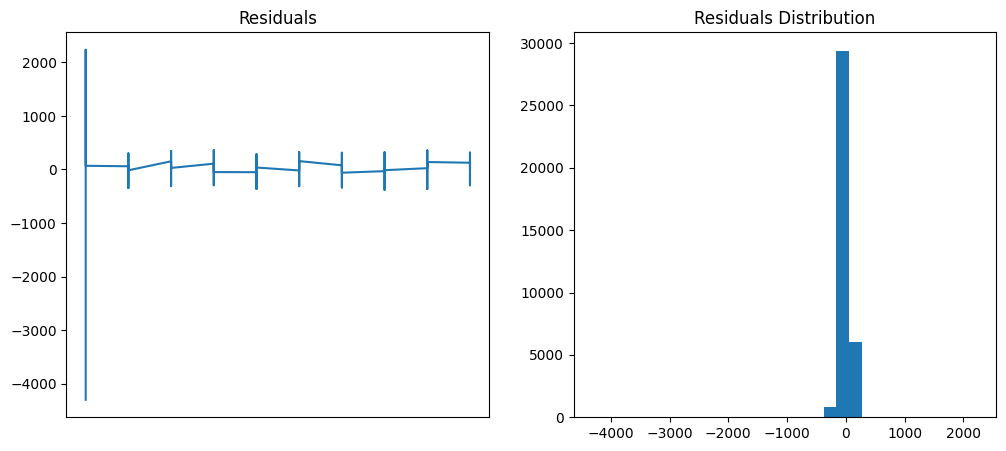

In [26]:
residuals = model_fit.resid
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(residuals) 
plt.title("Residuals")

plt.subplot(122)
plt.hist(residuals, bins=30)
plt.title("Residuals Distribution")
plt.show()

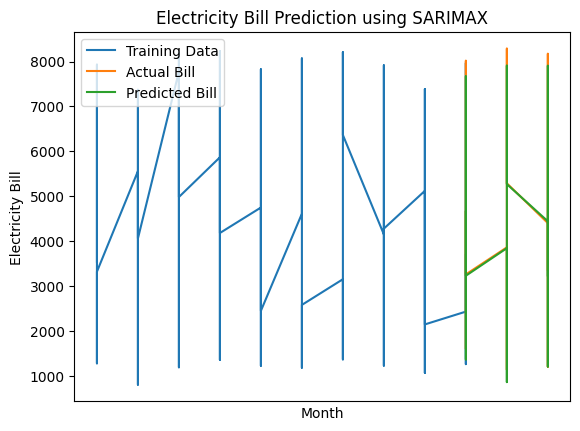

In [28]:
plt.Figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Bill')
plt.plot(y_test.index,y_pred, label='Predicted Bill')

plt.title('Electricity Bill Prediction using SARIMAX')
plt.xlabel('Month')
plt.ylabel('Electricity Bill')      
plt.legend()
plt.show()